


# Basics

In this exercise we look at simulating rolling a dice and calculate the entropy of the resulting distribution. Your homework will consist of implementating some small changes to the program (see below).

Same imports as in Ex1.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Prepare the dice rolls**

Use the [randint] function to generate 20 random integers. Careful about the boundaries - the lower bound is inclusive, the upper bounds is exclusive. So this gives us a standard 6-sided dice.

[randint]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html#numpy.random.randint

In [ ]:
dice_rolls = np.random.randint(1,7,20)

Verify that the distribution behaves as we expect:


In [ ]:
print("Mean: ", np.mean(dice_rolls))
print("Min: ", np.min(dice_rolls))
print("Max: ", np.max(dice_rolls))

Mean:  3.6
Min:  1
Max:  6


**Calculate the entropy of the distribution.**

There exist more elegant ways as well as premade functions for this task, but the goal is also to learn how to write a simple loop.

First we need to convert the list of dice rolls into the probabilities to roll each number 1..6. To this we start by counting the occurances of each number, and then divide by the total rools. Then we use the formula from the lecture to calculate the entropy.

In [ ]:
# Create an array with six entries, each time the number zero
counts = np.zeros(6)
print("Before counting:")
print(counts)

# This loops over all dice rolls
for roll in dice_rolls:
    # Increment the corresponding entry in the list of counts.
    # CAREFUL: Python array indices start at zero
    # This means we store the total number of ones in couts[0], 
    # the numbers of twos in counts[1], and so on.
    counts[roll-1] = counts[roll-1] + 1
print("After counting:")
print(counts)

Before counting:
[0. 0. 0. 0. 0. 0.]
After counting:
[3. 4. 1. 4. 6. 2.]


In [ ]:
# Turn into probabilities by dividing by the number of total events
probs = counts / len(dice_rolls)
print("Probabilities:", probs)

Probabilities: [0.15 0.2  0.05 0.2  0.3  0.1 ]


In [ ]:
# Calculate entropy
entropy = 0.
for prob in probs:
    entropy += (- prob * np.log2(prob))
print("The entropy of a dice roll is:", entropy, "bits")

The entropy of a dice roll is: 2.4086949695628417 bits


# Homework problems:
   * We used 20 dice rolls to estimate the entropy. How does the result change for 100, 1000 and 10000 rolls? What is the expected result for a perfect dice?
   * What if we had used a ten-sided or a twenty-sided dice instead? Plot the entropy versus the number of sides for at least 4 different values
   * Look at this [function] and see how you can use it to simulate an **unfair** six-sided dice. What is the entropy?
  
[function]: https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multinomial.html
    

# Solutions

Define a function that calculates the entropy for any number of sides (assuming a fair dice) and number of rolls.



In [ ]:
def calc_entropy(n_rolls, n_sides):
    dice_rolls = np.random.randint(1,1+n_sides,n_rolls)
    
    # Create an array of zeros with as many entries as we have sides
    counts = np.zeros(n_sides)

    # This loops over all dice rolls
    for roll in dice_rolls:
        counts[roll-1] = counts[roll-1] + 1

    # Turn into probabilities by dividing by the number of total events
    probs = counts / len(dice_rolls)

    # Calculate entropy
    entropy = 0.
    for prob in probs:
        entropy += (- prob * np.log2(prob))

    return entropy


We used 20 dice rolls to estimate the entropy. How does the result change for 100, 1000 and 10000 rolls? What is the expected result for a perfect dice?


In [ ]:

for rolls in [100,1000,10000]:
    print(rolls, calc_entropy(rolls,6))

print("Exact:", -np.log2(1/6))

100 2.535214847797445
1000 2.5824494138219514
10000 2.5841862654009207
Exact: 2.584962500721156


What if we had used a ten-sided or a twenty-sided dice instead? Plot the entropy versus the number of sides for at least 4 different values


[0.9999860346669425, 2.5847258100079524, 3.321370726538706, 4.321238163226352, 5.319447917470278, 6.636024004298015]


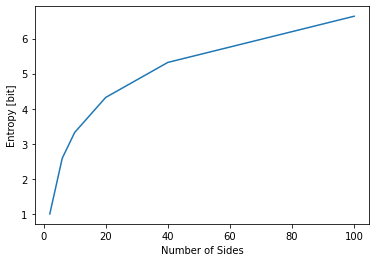

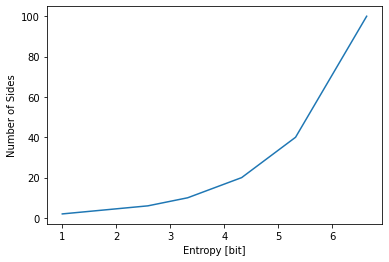

In [ ]:
# Calculate the entropies for different numbers of sides
sides = [2,6,10,20,40,100]
entropies = [calc_entropy(10000,side) for side in sides]
print(entropies)

def void():
  # And make a graph
  plt.plot(sides,entropies)
  _ = plt.xlabel("Number of Sides")
  _ = plt.ylabel("Entropy [bit]")
  plt.show()

  plt.clf()
  plt.plot(entropies,sides)
  _ = plt.xlabel("Entropy [bit]")
  _ = plt.ylabel("Number of Sides")
  plt.show()
  

void()

Look at this function and see how you can use it to simulate an unfair six-sided dice. What is the entropy?


In [ ]:
n_rolls = 10000    

counts = np.random.multinomial(n_rolls, [0.02, 0.02, 0.02, 0.9, 0.02, 0.02])

# Turn into probabilities by dividing by the number of total events
probs = counts / n_rolls

# Calculate entropy
entropy = 0.
for prob in probs:
    entropy += (- prob * np.log2(prob))

print("The entropy of a dice roll is:", entropy, "bits")

The entropy of a dice roll is: 0.6708311104833655 bits


And the examples from the interactive discussion:

In [ ]:
6*[3] # this is list,

[3, 3, 3, 3, 3, 3]

In [ ]:
6*np.array([3]) # this is a numpy array

array([18])

In [ ]:
[4,3]+[3,4] # adding lists concatenates them

[4, 3, 3, 4]

In [ ]:
np.array([3,4]) + np.array([4,3]) # adding numpy arrays adds the elements

array([7, 7])